<a href="https://colab.research.google.com/github/JulioSan02/UNCC/blob/4105/JS_4105_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [294]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Colab Notebooks/Data/D3.csv'
sample = pd.DataFrame(pd.read_csv(file_path))

# Separate features and labels
X1 = sample.values[:, 0]
# get input values from first column -- X is a list,
# which is a 1 dimentional array

X2 = sample.values[:, 1]
X3 = sample.values[:, 2]

y = sample.values[:, 3]
# get output values from second column -- Y is the
# list, which is a 2 dimentional array

m = len(y)  # Number of training examples
n = len(X1)  # Number of training examples
print('m = ', m)
print('n = ', n)

from IPython.display import display
display(sample)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
m =  100
n =  100


,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375
...,...,...,...,...
95,3.838384,1.460202,3.046061,-4.440595
96,3.878788,2.155152,3.494545,-4.458663
97,3.919192,2.850101,3.943030,-4.479995
98,3.959596,3.545051,0.391515,-3.304593


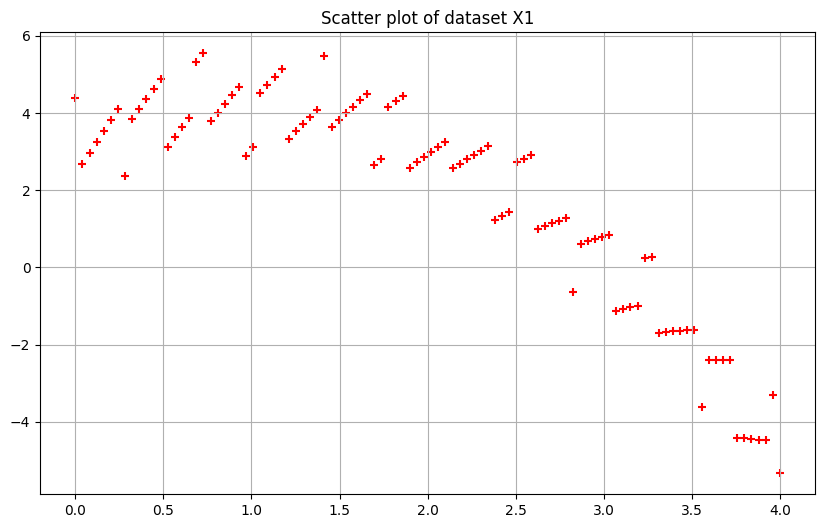

In [295]:
# Create scatter plot of y against X1
plt.scatter(X1, y, color='r', marker='+')

# Setting for graphing
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.title('Scatter plot of dataset X1')

# Displays graph for y against X1
plt.show()

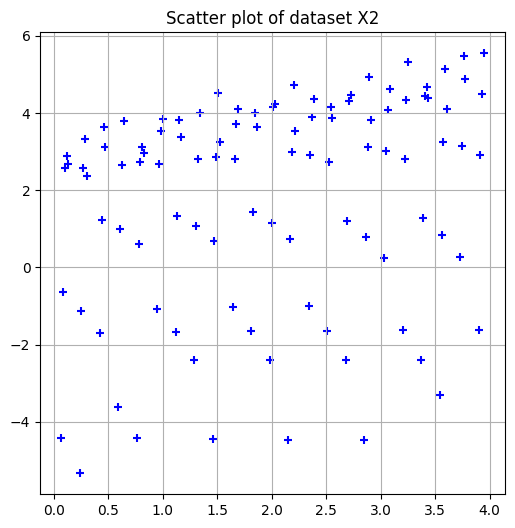

In [296]:
# Create scatter plot of y against X2
plt.scatter(X2, y, color='b', marker='+')

plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.title('Scatter plot of dataset X2')

plt.show()

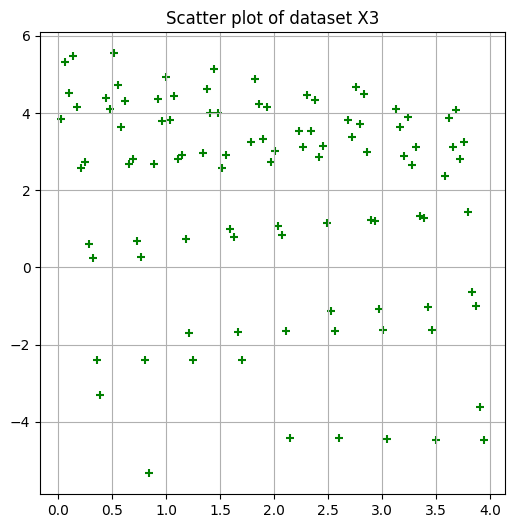

In [297]:
# Create scatter plot of y against X3
plt.scatter(X3, y, color='g', marker='+')

plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.title('Scatter plot of dataset X3')

plt.show()

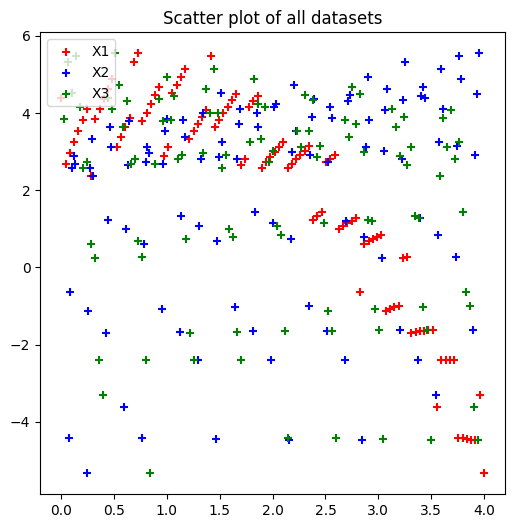

In [298]:
# Plots all datasets against y on the same graph
plt.scatter(X1, y, c='r', marker="+", label='X1')
plt.scatter(X2, y, c='b', marker="+", label='X2')
plt.scatter(X3, y, c='g', marker="+", label='X3')

plt.legend(loc='upper left')
plt.rcParams["figure.figsize"] = (6, 6)
plt.title('Scatter plot of all datasets')
plt.show()

In [299]:
# Training for X1

X_0 = np.ones((m, 1))
# creates a column vector of same length as all input datasets
# and output y by setting the # of rows for array to 100 and # of columns to 1

X_1 = X1.reshape(m, 1)
# turns the list vector X1 into  a column vector with
# number columns equal to # of elemnts in X1 list

X_1_final = np.hstack((X_0, X_1))
# combines X_0 and X_1 column vectors into a matrix of size (100,2)
# 100 rows and two columns, one for each original column vector

theta = np.zeros(2) # creates a vector for theta made up of 2 zeros

def compute_cost(X, y, theta):
    predictions = np.dot(X, theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

# "def compute_cost" defines a new function that takes three arguments and uses
# them to calculate the loss for the original values of theta, which are 0 and 0

cost_X1 = compute_cost(X_1_final, y, theta) # calls function to calculate
print('The cost for given values of theta_0 and theta_1 for dataset X1 =',
      cost_X1)

def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(X, y, theta)


    return theta, cost_history

# "def gradient_descent" defines a function that performs the gradient descent
# process to calculate the values of theta that provide minimal loss using the
# "for loop" for a set number of iterations, which adjust the theta values after
# each iteration
# gradient_descent also compiles the cost for each set of theta by completing
# the "cost_history" vector after each iteration

The cost for given values of theta_0 and theta_1 for dataset X1 = 5.524438459196242


In [300]:
iterations = 500
# changed from 1500 because gradient descent converged quickly when
# alpha was set to 0.1

alpha = 0.1

theta, cost_history = gradient_descent(X_1_final, y, theta, alpha, iterations)
print('Final value of theta for dataset X1 =', theta)
print('cost_history for dataset X1 =', cost_history[-10:])

# gradient_descent function is called above to calculate the best values for
# theta_0 and theta_1 for dataset X1

Final value of theta for dataset X1 = [ 5.92786943 -2.0383057 ]
cost_history for dataset X1 = [0.98499308 0.98499308 0.98499308 0.98499308 0.98499308 0.98499308
 0.98499308 0.98499308 0.98499308 0.98499308]


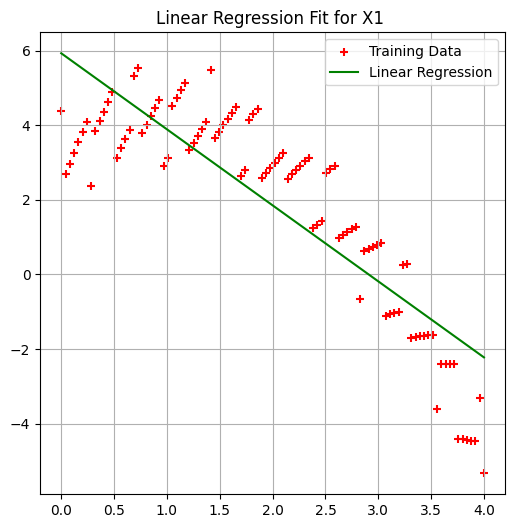

In [301]:
# Create scatter plot of X1 against y
plt.scatter(X_1_final[:,1], y, color='r', marker='+', label='Training Data')
# graph only references data for X1 and not X0 because "[:,1]" selects all rows
# for column 1 (python starts on 0 so column 0 refers to X0)

# Plots processed dataset X1 against y
plt.plot(X_1_final[:,1], X_1_final.dot(theta), color='g',
         label='Linear Regression')
# "X_1_final.dot(theta)" applies final values for theta_0 and theta_1 on
# dataset X1 to create a linear model that generalizes the output y based on X1

plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.title('Linear Regression Fit for X1 ')
plt.legend()

plt.show()


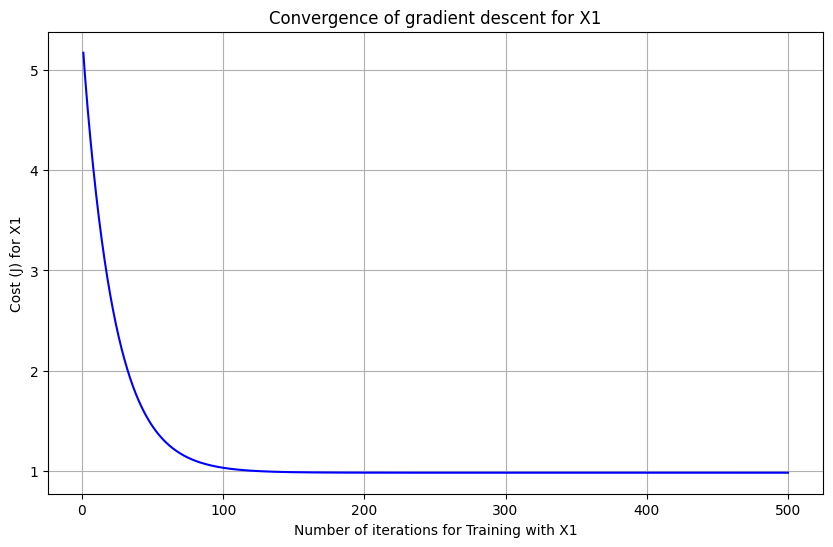

In [302]:
# Plots loss function for X1
plt.plot(range(1, iterations + 1), cost_history, color='b')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
# loss function uses cost_history of model trained on X1 because cost_history
# has all the values for cost of each theta set

plt.xlabel('Number of iterations for Training with X1')
plt.ylabel('Cost (J) for X1')
plt.title('Convergence of gradient descent for X1')

plt.show()

In [303]:
# Training for X2

# This follows the exact same process for training X1

X_2 = X2.reshape(m, 1)
X_2_final = np.hstack((X_0, X_2))

cost_X2 = compute_cost(X_2_final, y, theta)
print('The cost for given values of theta_0 and theta_1 for dataset X2 =',
      cost_X2)

# Functions defined for training on X1 do not need to be defined again for training
# on other datasets, only called upon

The cost for given values of theta_0 and theta_1 for dataset X2 = 8.182416582958929


In [304]:
theta, cost_history = gradient_descent(X_2_final, y, theta, alpha, iterations)
print('Final value of theta2 for dataset X2 =', theta)
print('cost_history for dataset X2 =', cost_history[-10:])

Final value of theta2 for dataset X2 = [0.73613381 0.55757905]
cost_history for dataset X2 = [3.59936602 3.59936602 3.59936602 3.59936602 3.59936602 3.59936602
 3.59936602 3.59936602 3.59936602 3.59936602]


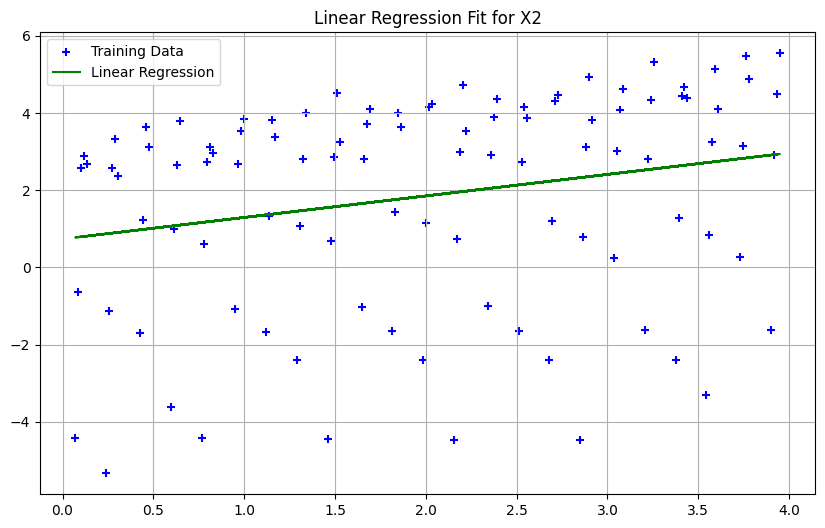

In [305]:
plt.scatter(X_2_final[:,1], y, color='b', marker='+', label='Training Data')

plt.plot(X_2_final[:,1], X_2_final.dot(theta), color='g', label='Linear Regression')

plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.title('Linear Regression Fit for X2')
plt.legend()

plt.show()

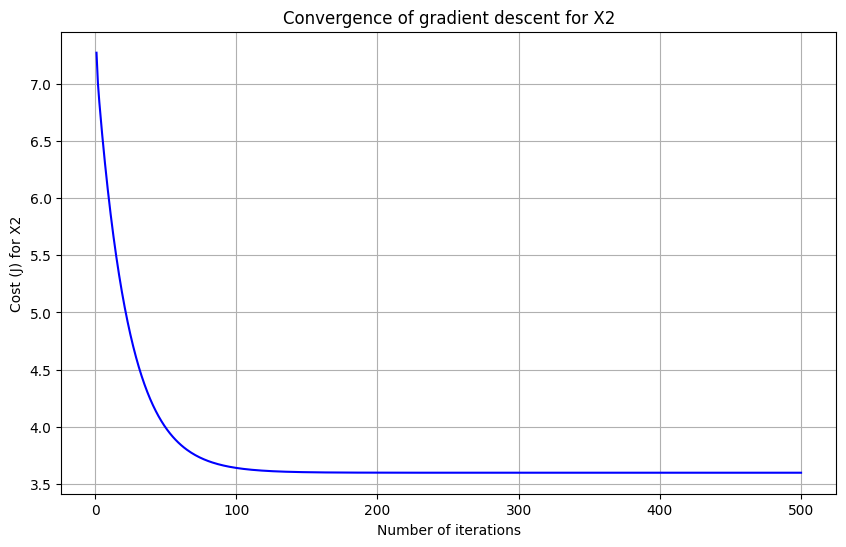

In [306]:
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J) for X2')
plt.title('Convergence of gradient descent for X2')

plt.show()

In [307]:
# Training for X3

X_3 = X3.reshape(m, 1)
X_3_final = np.hstack((X_0, X_3))

cost_X3 = compute_cost(X_3_final, y, theta)
print('The cost for given values of theta_0 and theta_1 for dataset X3 =', cost_X3)

The cost for given values of theta_0 and theta_1 for dataset X3 = 4.407835811885744


In [308]:
theta, cost_history = gradient_descent(X_3_final, y, theta, alpha, iterations)
print('Final value of theta for dataset X3 =', theta)
print('cost_history for dataset X3 =', cost_history[-10:])

Final value of theta for dataset X3 = [ 2.87139655 -0.52047278]
cost_history for dataset X3 = [3.62945112 3.62945112 3.62945112 3.62945112 3.62945112 3.62945112
 3.62945112 3.62945112 3.62945112 3.62945112]


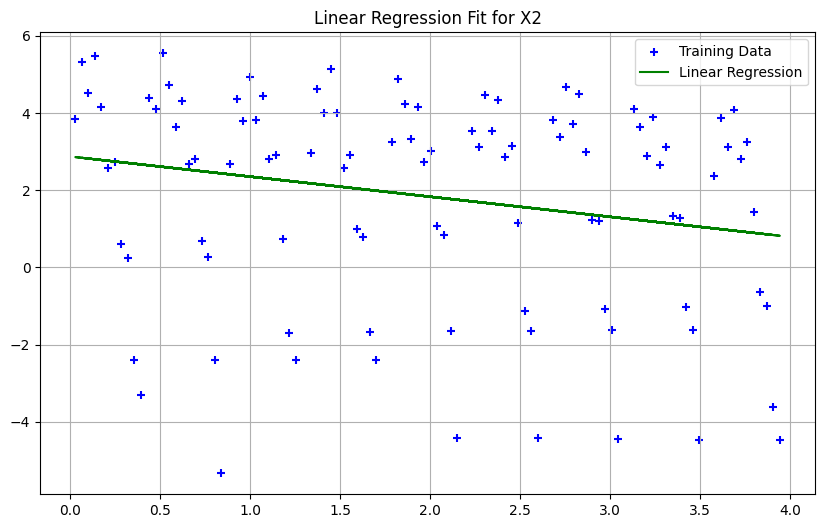

In [309]:
plt.scatter(X_3_final[:,1], y, color='b', marker='+', label='Training Data')

plt.plot(X_3_final[:,1], X_3_final.dot(theta), color='g', label='Linear Regression')

plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.title('Linear Regression Fit for X2')
plt.legend()

plt.show()

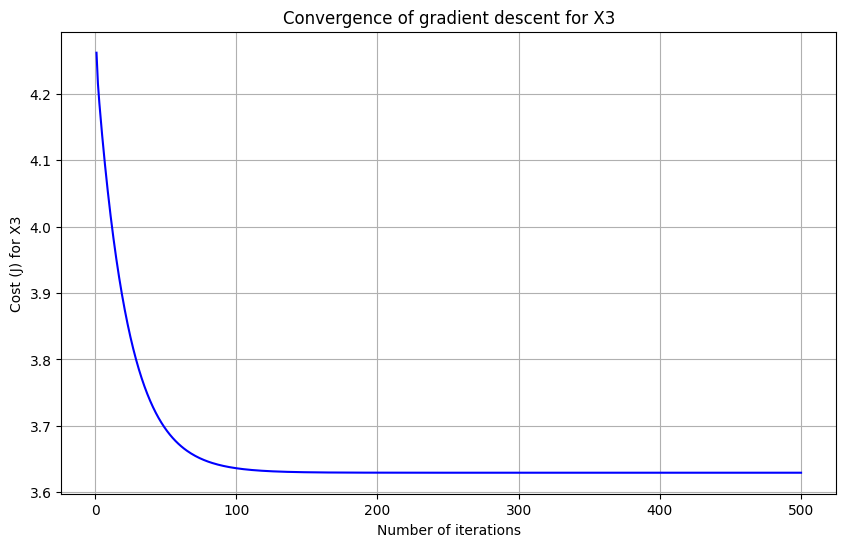

In [310]:
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J) for X3')
plt.title('Convergence of gradient descent for X3')

plt.show()

The first explanatory variable - in my case, it is X1 - has a lower cost for explaining the output because it follows a linear trend much more closely than the other variables.

It seems that when alpha is closer to 0.1, the loss graphs change very quickly and reach their final value in less iterations, while also resulting in a smaller final cost. When alpha is closer to 0.01, the loss graphs change much more slowly and take many more iterations to reach their final loss value, while also resulting in a larger final cost

In [311]:
# Traning using all input variables: X1, X2, and X3

X_0 = np.ones((m, 1))
X_1 = X1.reshape(m, 1)
X_2 = X2.reshape(m, 1)
X_3 = X3.reshape(m, 1)
X_final = np.hstack((X_0, X_1, X_2, X_3))
# First difference between training with only one dataset and multiple is that
# all datasets are stacked with X0 column vector

theta_new = np.zeros(4)
# Second difference is that theta now must be 4 elements long because there are
# three columns for X, the three datasets and column vector X0

cost_X_final = compute_cost(X_final, y, theta_new)
print('The cost for given values of theta_0 and theta_1 for all X datasets =',
      cost_X_final)
# all functions are called just like when training with a single dataset

The cost for given values of theta_0 and theta_1 for all X datasets = 5.524438459196242


In [312]:
theta, cost_history = gradient_descent(X_final, y, theta_new, alpha, iterations)
print('Final value of theta for all X datasets =', theta)
print('cost_history for all X datasets =', cost_history[-10:])


Final value of theta for all X datasets = [ 5.27950776 -1.99882305  0.53829059 -0.2605215 ]
cost_history for all X datasets = [0.73854088 0.73853936 0.73853787 0.73853641 0.73853497 0.73853357
 0.7385322  0.73853085 0.73852953 0.73852823]


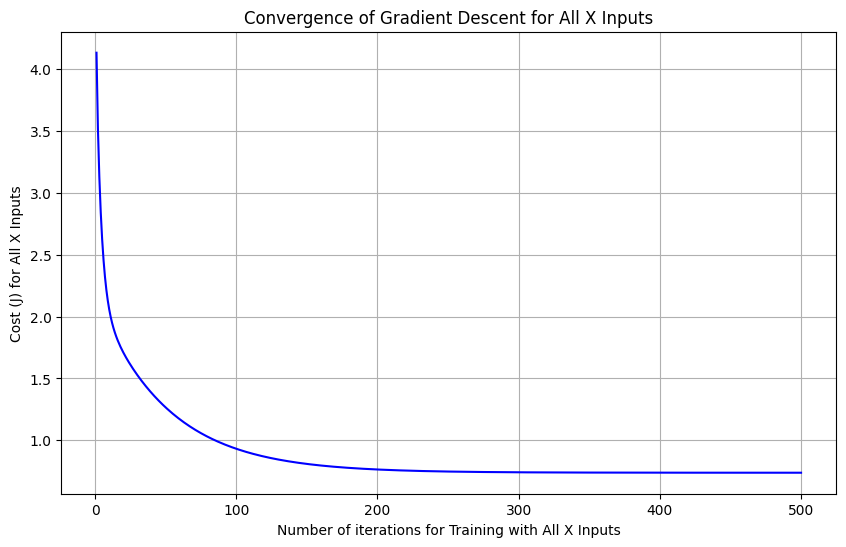

In [313]:
plt.plot(range(1, iterations + 1), cost_history, color='b')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations for Training with All X Inputs')
plt.ylabel('Cost (J) for All X Inputs')
plt.title('Convergence of Gradient Descent for All X Inputs')

plt.show()

In [314]:
# To use the model to predict the value of y from the given values for X1, X2,
# and X3 a new vector with the given values is created and then dot multiplied
# with the final theta_0 and theta_1 values, which were calculted by training
# model with all datasets

all_ex_X0 = 1;

ex_1_array = np.array([all_ex_X0,1,1,1])
print(ex_1_array)

new_y_1 = ex_1_array.dot(theta)
print('\n', new_y_1)

[1 1 1 1]

 3.5584537970170693


In [315]:
ex_2_array = np.array([all_ex_X0,2,0,4])
print(ex_2_array)

new_y_2 = ex_2_array.dot(theta)
print('\n', new_y_2)

[1 2 0 4]

 0.23977565356263764


In [316]:
ex_3_array = np.array([all_ex_X0,3,2,1])
print(ex_3_array)

new_y_3 = ex_3_array.dot(theta)
print('\n', new_y_3)

[1 3 2 1]

 0.09909827944161465
